# This notebook is used to perform Kv fittings for Edge,Core,2NN,3NN and 4NN vial locations using TDLAS data.

In [2]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
from mpl_toolkits import mplot3d
from scipy.linalg import lstsq
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import  Axes3D

## Load Data

In [74]:
#Load Data
file_location = r'C:\Users\sbadih\OneDrive - Gilead Sciences\TDLAS Kv Data.xlsx'
assert os.path.isfile(file_location)
df1 = pd.read_excel(file_location,sheet_name='Sheet1')
df2 = pd.read_excel(file_location,sheet_name='Sheet2')
print(list(df1.columns))
print(list(df2.columns))

['Pressure (mTorr)', 'Kv Avg', 'Kv Edge', 'Kv Ctr']
['TC2_4NN_Orig. Mod, Front', 'TC13_3NN_Mod w/ 3.5, Front', 'TC1_2NN_Orig. Mod, Front', 'Pressure (mTorr)']


In [75]:
# Store Variables
press1=(df1[['Pressure (mTorr)']]).values
press2=(df2[['Pressure (mTorr)']]).values
kv_core=(df1[['Kv Edge']]).values
kv_edge=(df1[['Kv Ctr']]).values
kv_2NN=(df2[['TC1_2NN_Orig. Mod, Front']]).values
kv_3NN=(df2[['TC13_3NN_Mod w/ 3.5, Front']]).values
kv_4NN=(df2[['TC2_4NN_Orig. Mod, Front']]).values

## Define Fitting Function

In [14]:
# # Function for fitting Kv based on only chamber pressure values

# def kv_fit(x, z): #inputs are chamber pressure(x) and kv values(z)
    
#     def function(x,a, b, c):
#         return a+(b*x/1+c*x)

#     z_data = z.reshape(-1).tolist()
#     x_data = x.reshape(-1).tolist()

#     # get fit parameters from scipy curve fit
#     parameters_c, covariance_c = curve_fit(function, x_data, z_data, maxfev=100000)

#     #Predict Z values based on fit
#     model_x_data = np.linspace(min(x_data), max(x_data), 30)
#     Z = function(model_x_data, *parameters_c)
    
#     # setup figure object
#     fig = plt.figure(figsize=(5,5))
#     plt.plot(model_x_data,Z,color="green")

#     # plot input data
#     plt.scatter(x_data, z_data, color="red")
#     # set plot descriptions
#     plt.xlabel('Chamber Pressure (mTorr)')
#     plt.ylabel("Kv Value")
#     plt.show()
#     print("Parameters for Predicting Kv:",parameters_c)
#     print("Covariance:\n",covariance_c)
#     return parameters_c

In [76]:
# Function for fitting Kv based on only chamber pressure values

def kv_fit(pc, kv_calc): #inputs are chamber pressure(x) and kv values(z)
    pc=pc.reshape(-1)
    kv_calc=kv_calc.reshape(-1)

    #Define Residuals Function
    def residuals(theta,pc,kv_calc):
        kv_fit = theta[0]+((theta[1]*pc)/(1+theta[2]*pc)) #Fitted Resistance
        res=kv_fit-kv_calc      
        return res
    #Define Parameter Set
        #theta=[a,b,c]
    theta_0=np.array([0,1,2]).astype("float")
    
    #Least Squares Fitting
    param=least_squares(residuals,theta_0, loss='soft_l1', f_scale=0.1,args=(pc,kv_calc))
    print("Parameters:",param.x)
    
    pc_data= np.linspace(min(pc), max(pc), 30)
    #Find predicted kv values
    kv_pred=param.x[0]+((param.x[1]*pc_data)/(1+param.x[2]*pc_data)) 
        
    # setup figure object
    fig = plt.figure(figsize=(5,5))
    plt.plot(pc_data,kv_pred,color="green")

    # plot input data
    plt.scatter(pc,kv_calc, color="red")
    # set plot descriptions
    plt.xlabel('Chamber Pressure (mTorr)')
    plt.ylabel("Kv Value")
    plt.show()
    print("Parameters for Predicting Kv:",param.x)
    return param.x

## Edge Case

Parameters: [-0.02085326  0.02203906  1.00944084]


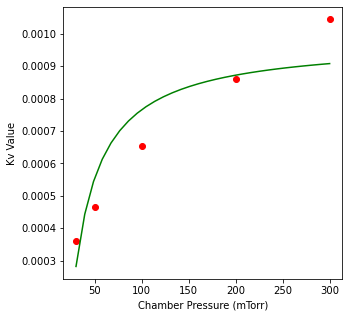

Parameters for Predicting Kv: [-0.02085326  0.02203906  1.00944084]


In [77]:
edge_pred=kv_fit(press1,kv_edge)

## Core Case

Parameters: [-1.38999158e-04  2.23914642e-05  1.25057569e-02]


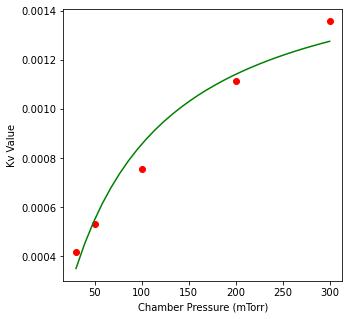

Parameters for Predicting Kv: [-1.38999158e-04  2.23914642e-05  1.25057569e-02]


In [78]:
core_pred=kv_fit(press1,kv_core)

## 2NN

Parameters: [-0.02409536  0.0257241   1.0199828 ]


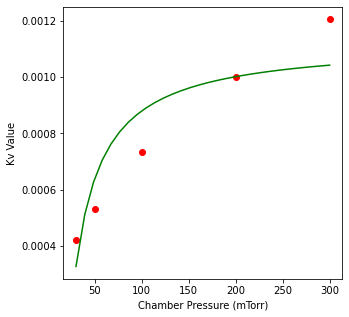

Parameters for Predicting Kv: [-0.02409536  0.0257241   1.0199828 ]


In [79]:
pred_2NN=kv_fit(press2,kv_2NN)

## 3NN

Parameters: [-0.02360384  0.02521627  1.01639398]


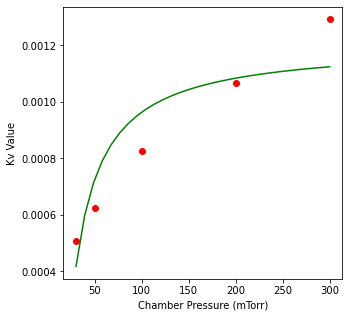

Parameters for Predicting Kv: [-0.02360384  0.02521627  1.01639398]


In [80]:
pred_3NN=kv_fit(press2,kv_3NN)

## 4NN

Parameters: [2.80249811e-04 6.02162511e-06 2.44841427e-03]


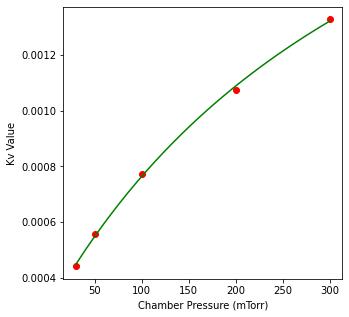

Parameters for Predicting Kv: [2.80249811e-04 6.02162511e-06 2.44841427e-03]


In [81]:
pred_4NN=kv_fit(press2,kv_4NN)

## Combined Graph

In [82]:
def fit(a,b,c):
    fit=a+((b*press1)/(1+c*press1)) 
    return fit

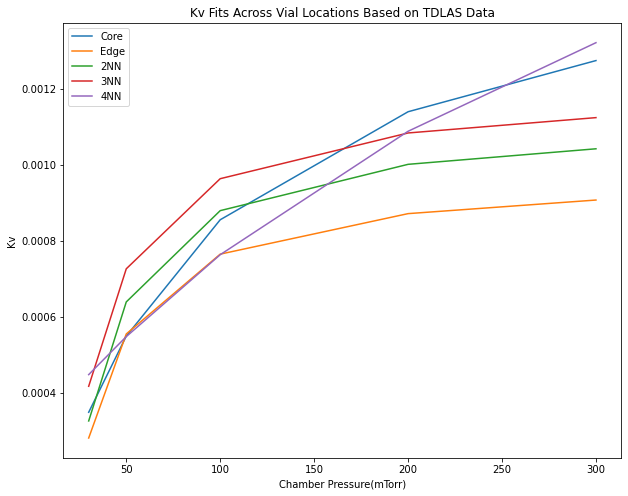

In [83]:
plt.figure(figsize=(10,8))
plt.plot(press1,fit(core_pred[0],core_pred[1],core_pred[2]),label="Core")
plt.plot(press1,fit(edge_pred[0],edge_pred[1],edge_pred[2]),label="Edge")
plt.plot(press1,fit(pred_2NN[0],pred_2NN[1],pred_2NN[2]),label="2NN")
plt.plot(press1,fit(pred_3NN[0],pred_3NN[1],pred_3NN[2]),label="3NN")
plt.plot(press1,fit(pred_4NN[0],pred_4NN[1],pred_4NN[2]),label="4NN")
plt.title("Kv Fits Across Vial Locations Based on TDLAS Data")
plt.xlabel("Chamber Pressure(mTorr)")
plt.ylabel("Kv")
plt.legend()